In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
movies_data = pd.read_csv('movies.dat', sep="::", names=['MovieID', 'Title', 'Genres'])
ratings_data = pd.read_csv('ratings.dat', sep="::", names=['UserID','MovieID','Rating','Timestamp'])
users_data = pd.read_csv('users.dat', sep="::", names=['UserID','Gender','Age', 'Occupation', 'Zip-code'])

/Volumes/Dastagiri/Installs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/Volumes/Dastagiri/Installs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
/Volumes/Dastagiri/Installs/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid t

In [3]:
# movies_data.info()


In [4]:
# ratings_data.info()

In [5]:
# users_data.info()

In [6]:
 movies_data.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
ratings_data.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
 users_data.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [9]:
# users_data.head()

In [10]:
movies_ratings = pd.merge(movies_data, ratings_data, on='MovieID')

In [11]:
movies_ratings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
MovieID      1000209 non-null int64
Title        1000209 non-null object
Genres       1000209 non-null object
UserID       1000209 non-null int64
Rating       1000209 non-null int64
Timestamp    1000209 non-null int64
dtypes: int64(4), object(2)
memory usage: 53.4+ MB


In [12]:
movies_ratings.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [13]:
Final_Data = pd.merge(movies_ratings, users_data, on='UserID')

In [14]:
Final_Data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [15]:
Final_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
MovieID       1000209 non-null int64
Title         1000209 non-null object
Genres        1000209 non-null object
UserID        1000209 non-null int64
Rating        1000209 non-null int64
Timestamp     1000209 non-null int64
Gender        1000209 non-null object
Age           1000209 non-null int64
Occupation    1000209 non-null int64
Zip-code      1000209 non-null object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


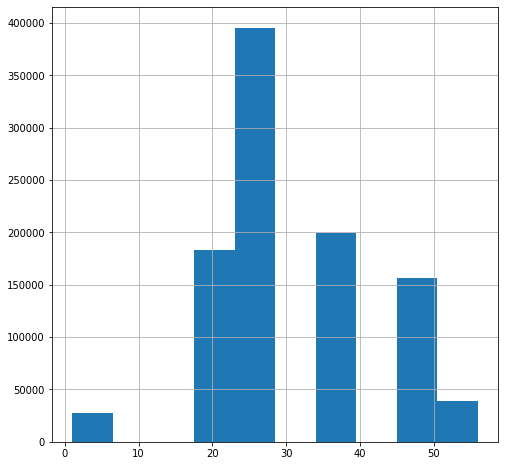

In [16]:
plt.figure(figsize=(8, 8))
Final_Data.Age.hist(bins=10)
plt.show()

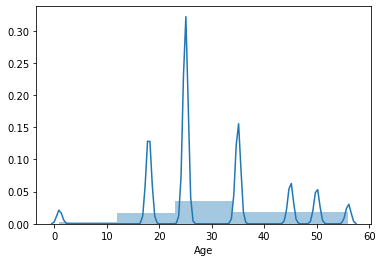

In [17]:
sns.distplot(Final_Data.Age, bins=5)

In [18]:
Final_Data[Final_Data.Title.str.contains('Toy Story')]['Title'].unique()

array(['Toy Story (1995)', 'Toy Story 2 (1999)'], dtype=object)

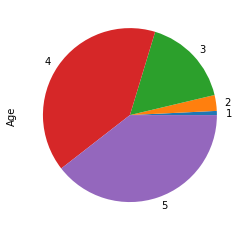

In [19]:
Final_Data[Final_Data.Title=='Toy Story (1995)'].groupby('Rating').Age.count().plot(kind='pie')

In [20]:
Final_Data[Final_Data.Title=='Toy Story (1995)'].groupby('Rating').MovieID.count()

Rating
1     16
2     61
3    345
4    835
5    820
Name: MovieID, dtype: int64

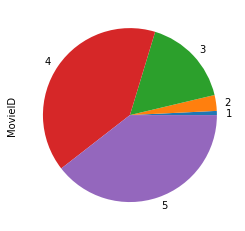

In [21]:
Final_Data[Final_Data.Title=='Toy Story (1995)'].groupby('Rating').MovieID.count().plot(kind='pie')

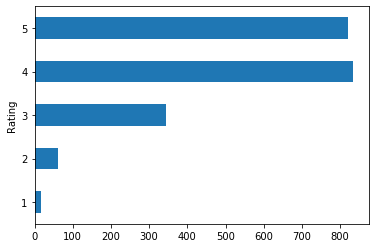

In [22]:
Final_Data[Final_Data.Title=='Toy Story (1995)'].groupby('Rating').MovieID.count().plot(kind='barh')

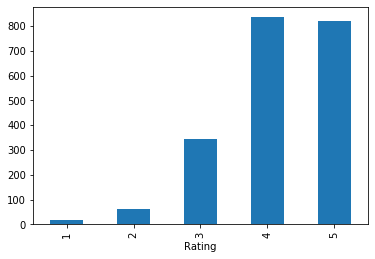

In [23]:
Final_Data[Final_Data.Title=='Toy Story (1995)'].groupby('Rating').MovieID.count().plot(kind='bar')

In [24]:
Final_Data.groupby('Title').Rating.count().nlargest(25)

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

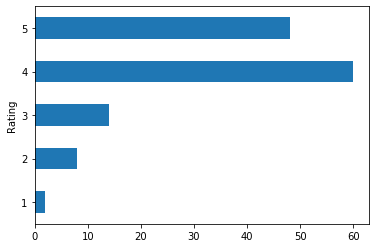

In [25]:
Final_Data[Final_Data.UserID==2656].groupby('Rating')['MovieID'].count().plot(kind='barh')
plt.show()

In [26]:
gener = Final_Data.Genres

In [27]:
gener

0                   Animation|Children's|Comedy
1          Animation|Children's|Musical|Romance
2                                         Drama
3               Action|Adventure|Fantasy|Sci-Fi
4                                     Drama|War
                           ...                 
1000204                          Drama|Thriller
1000205                  Comedy|Horror|Thriller
1000206                          Comedy|Romance
1000207                         Action|Thriller
1000208                            Action|Drama
Name: Genres, Length: 1000209, dtype: object

In [28]:
finalGen_set = []
for gen in gener:
    finalGen_set.extend(ele for ele in gen.split('|'))
finalGen_set = list(set(finalGen_set))
finalGen_set = sorted(finalGen_set)
finalGen_set

['Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [29]:
finalGen_set
dummyLabelData = pd.DataFrame([], columns=finalGen_set)
dummyLabelData

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western


In [30]:
def get_du(a):
    return [int(col in a) for col in dummyLabelData.columns]
gen_one_HE = Final_Data.Genres.apply(get_du)

In [42]:
generes = pd.DataFrame(list(gen_one_HE.values), columns=finalGen_set)

In [49]:
Master_data = pd.concat([generes, Final_Data.loc[:,['MovieID', 'Title', 'UserID', 'Age', 'Gender', 'Occupation', 'Rating']]], axis=1)

In [51]:
Master_data

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,...,Thriller,War,Western,MovieID,Title,UserID,Age,Gender,Occupation,Rating
0,0,0,1,1,1,0,0,0,0,0,...,0,0,0,1,Toy Story (1995),1,1,F,10,5
1,0,0,1,1,0,0,0,0,0,0,...,0,0,0,48,Pocahontas (1995),1,1,F,10,5
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,150,Apollo 13 (1995),1,1,F,10,5
3,1,1,0,0,0,0,0,0,1,0,...,0,0,0,260,Star Wars: Episode IV - A New Hope (1977),1,1,F,10,4
4,0,0,0,0,0,0,0,1,0,0,...,0,1,0,527,Schindler's List (1993),1,1,F,10,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,0,0,0,0,0,0,0,1,0,0,...,1,0,0,3513,Rules of Engagement (2000),5727,25,M,4,4
1000205,0,0,0,0,1,0,0,0,0,0,...,1,0,0,3535,American Psycho (2000),5727,25,M,4,2
1000206,0,0,0,0,1,0,0,0,0,0,...,0,0,0,3536,Keeping the Faith (2000),5727,25,M,4,5
1000207,1,0,0,0,0,0,0,0,0,0,...,1,0,0,3555,U-571 (2000),5727,25,M,4,3


In [59]:
from scipy.stats import chi2_contingency

In [86]:
features = Master_data.drop('Rating', axis=1).values

In [88]:
# features.head()

In [89]:
labels = Master_data['Rating'].values

In [90]:
# labels.head()

In [60]:
#Hypothesis Testing
def validate_chi2(col):
    ct = pd.crosstab(features[col], labels)
    stat,pvalue,dof,expected_R = chi2_contingency(ct)

    if pvalue <= 0.05:
        print("Alternate Hypothesis passed. {} and Profit have Relationship".format(col))
    else:
        print("Null hypothesis passed. {} and Profit doesnot have  Relationship".format(col))


for col in features:
    validate_chi2(col)

Alternate Hypothesis passed. Action and Profit have Relationship
Alternate Hypothesis passed. Adventure and Profit have Relationship
Alternate Hypothesis passed. Animation and Profit have Relationship
Alternate Hypothesis passed. Children's and Profit have Relationship
Alternate Hypothesis passed. Comedy and Profit have Relationship
Alternate Hypothesis passed. Crime and Profit have Relationship
Alternate Hypothesis passed. Documentary and Profit have Relationship
Alternate Hypothesis passed. Drama and Profit have Relationship
Alternate Hypothesis passed. Fantasy and Profit have Relationship
Alternate Hypothesis passed. Film-Noir and Profit have Relationship
Alternate Hypothesis passed. Horror and Profit have Relationship
Alternate Hypothesis passed. Musical and Profit have Relationship
Alternate Hypothesis passed. Mystery and Profit have Relationship
Alternate Hypothesis passed. Romance and Profit have Relationship
Alternate Hypothesis passed. Sci-Fi and Profit have Relationship
Alter

In [91]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [93]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

fe_Le = LabelEncoder()
features[:, -5] = fe_Le.fit_transform(features[:, -5])

ge_Le = LabelEncoder()
features[:, -2] = ge_Le.fit_transform(features[:, -2])

In [94]:
features[:, -2]

array([0, 0, 0, ..., 1, 1, 1], dtype=object)

In [95]:
fe_ohe = OneHotEncoder(categorical_features=[-5, -2])
features = fe_ohe.fit_transform(features).toarray()

/Volumes/Dastagiri/Installs/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [96]:
features

array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+01],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.000e+00, 1.000e+00,
        1.000e+01],
       ...,
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 5.727e+03, 2.500e+01,
        4.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 5.727e+03, 2.500e+01,
        4.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 5.727e+03, 2.500e+01,
        4.000e+00]])

In [97]:
get_du("Animation|Thriller")

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, labels, random_state=1, test_size=0.4)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(x_train,y_train)

In [ ]:
model.score(x_test, y_test)

In [ ]:
model.score(x_train,y_train)